# Computational Astrophysics
## Ordinary Differential Equations. 01

---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

### About this notebook

In this notebook we present some of the techniques to solve a system of Ordinary Differential Equations.

`A. Garcia. Numerical Methods for Physics. (1999). Chapter 3 `

---

## Ordinary Differential Equations

A system of first-order ordinary differential equations (ODEs)
is a relationship between an unknown (vectorial) function
$y(x)$ and its derivative $y^\prime(x)$. The
general system of first-order ODEs has the form

\begin{equation}
y^\prime (x) =f(x,y(x))\,.
\end{equation}

A solution to the differential equation is,
obviously, any function $y(x)$ that satisfies it.


There are two general classes of first-order ODE problems:

1. Initial value problems: $y(x_i)$ is given at some starting point $x_i$.

2. Two-point boundary value problems: $y$ is known at two ends (boundaries) of the domain and these **boundary conditions** must be satisfied simultaneously.






---
### Reduction to First-Order ODE

Any ODE can be reduced to first-order form by introducing additional
variables.

#### Example

\begin{equation}
y''(x) + q(x) y'(x) = r(x)\,\,.
\end{equation}

Introducing a new function $z(x)$ this can be written as a system of first-order ODE,

\begin{align}
\text{(1)}\,\, y'(x) &= z(x)\\
\text{(2)}\,\, z'(x) &= r(x) - q(x) z(x).
\end{align}


---
## Explicit and Implicit Methods of Solution of ODE

Broadly speaking, the methods for integrating ODEs are clasiffied into *explicit* and *implicit* methods.

Explicit methods use differences of the system to construct and update of the solution using the current (and previous) values of the dependent variables. Some examples of explicit methods are Euler's and Runge-Kutta's methods.

Implicit methods evaluate the right-hand side using the new value of the function that we are solving for.

--- 
## Errors and ODE

All procedures to solve numerically an ODE consist of transforming
a continuous differential equation into a discrete iteration procedure
that starts from the initial conditions and returns the values of the
dependent variable $y(x)$ at points $x_m = x_0 + m * h$, where $h$
is the discretization step size  assumed to be constant here).

Two kinds of errors can arise in this procedure:
1. **Round-off error.** Due to limited float point accuracy. The global round-off is the sum of the local float point errors.


2. **Truncation error.** 


* Local: The error made in one step when we replace a continuous process
  (e.g. a derivative) with a discrete procedure (e.g., a forward difference).

* Global: If the local truncation error is $\mathcal{O}(h^{n+1})$, then the global truncation error must be $\mathcal{O}(h^n)$, since the number of steps used in evaluating the derivatives to reach an arbitrary point $x_f$, having started at $x_0$, is $\frac{x_f - x_0}{h}$.

---
---

## Euler's Method

We want to solve the ODE

\begin{equation}
y' = f(x,y)
\end{equation}

with the initial condition $y(x_0) = y_0$. We introduce
a fixed stepsize $h$ and obtain an estimate of $y(x)$ at
$x_1 = x_0 + h$ using Taylor's theorem,

\begin{equation}
\begin{aligned}
y(x_1) &= y(x_0+h) = y(x_0) + y'(x_0) h + \mathcal{O}(h^2)\,,\\
       &= y(x_0) + h f(x_0,y(x_0)) +  \mathcal{O}(h^2)\,.
\end{aligned}
\end{equation}


By analogy, we obtain that the value $y_{n+1}$ of the function at the
point $x_{n+1} = x_0 + (n+1) h$ is given by

\begin{equation}
y_{n+1} = y(x_{n+1}) = y_n + h f(x_n,y(x_n)) + \mathcal{O}(h^2)\,.
\end{equation}


This is called the **forward Euler Method**.

---
Euler's method is extremely simple, but rather inaccurate and potentially unstable.

The error scales $\propto h^2$ locally. However, if $L$ is
the length of the domain, then $h = L / N$, where $N$ is the number of points
used to cover it. Since we are taking $N$ integration steps, the global
error is $\propto N h^2 = N L^2 / N^2 = L L/N \propto h$. 

Hence, forward Euler is a first-order accurate method globally.

### Stability

Forward Euler is an **explicit** method. This means that 
$y_{n+1}$ is given explicitly in terms of known quantities
$y_n$ and $f(x_n,y_n)$.
 
Explicit methods are simple and efficient, but the drawback is that
the step size must be small for stability.


### Example

\begin{equation}
\frac{dy}{dt} = -a y\,\,, \hspace{1cm}\text{with} \hspace{1cm}  
y(0) = 1\,,\,\, a > 0\,\,.
\end{equation}

The exact solution to this problem is $y = e^{-at}$,
which is stable and  smooth with $y(0) = 1$ and
$y(\infty) = 0$.

Applying forward Euler,

\begin{equation}
y_{n+1} = y_n - a\, h\, y_n = (1-ah) y_{n} 
\end{equation}

\begin{equation}
y_{n+1}  = (1-ah)^2 y_{n-1} = \cdots = (1-ah)^{n+1} y_0\,\,.
\end{equation}

This implies that in order to prevent any potential amplification of
errors, we must require that $|1-ah|<1$.

In fact, there are  3 cases,

| | | |
|:-: | :-: | :--|
| $0 < 1-ah < 1$  | : | $(1-ah)^{n+1}$ decays (good!) |
|$-1 < 1-ah < 0$ | : | $(1-ah)^{n+1}$ oscillates (not so good!)|
|$1-ah < -1$     | : | $(1-ah)^{n+1}$ oscillates and diverges (bad!)|


This gives the stability criterion of $0< h < \frac{2}{a}$.

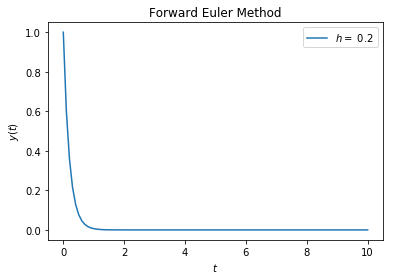

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def ODE(y):
    a=2.
    rhs = -a*y
    return rhs


def FEuler(h, t0, q0):
    '''
    ------------------------------------------
    FEuler(h, t0, q0)
    ------------------------------------------
    Forward Euler's method for solving a ODEs 
    system.
    Arguments:
    h: stepsize for the iteration
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    ------------------------------------------
    '''
    f = ODE(q0)
    q1 = q0 + h*f
    return q1


# Creation of the Grid
t_0 = 0.
t_f = 10.
n = 100
h = 0.2
#h = (t_f - t_0)/n


# Initial value
y_0 = 1.


# Variables setup
t = np.linspace(t_0, t_f, n)
y = np.zeros(n)
y[0] = y_0

# Main Loop
for i in range(1,n):
    y[i] = FEuler(h, t[i-1], y[i-1])

# Plot
fig, ax = plt.subplots()
ax.plot(t, y, label=f'$h=$ {h:.1f}')
ax.set_title('Forward Euler Method')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$y(t)$')
plt.legend()
plt.show()

Lets check the stability of the method.

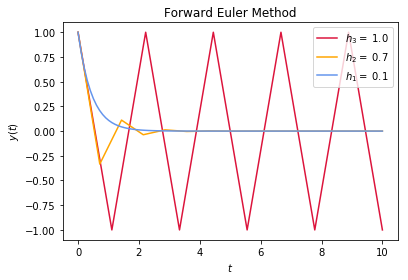

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def ODE(y):
    a=2.
    rhs = -a*y
    return rhs


def FEuler(h, t0, q0):
    '''
    ------------------------------------------
    FEuler(h, t0, q0)
    ------------------------------------------
    Forward Euler's method for solving a ODEs 
    system.
    Arguments:
    h: stepsize for the iteration
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    ------------------------------------------
    '''
    f = ODE(q0)
    q1 = q0 + h*f
    return q1

# Initial Condition
y_0 = 1.

# Creation of the grid
t_0 = 0.
t_f = 10.

# Three stepsizes to compare
n1 = 100
h1 = (t_f - t_0)/n1

n2 = 15
h2 = (t_f - t_0)/n2

n3 = 10
h3 = (t_f - t_0)/n3


# Arrays to store the solution
t1 = np.linspace(t_0, t_f, n1)
y1 = np.zeros(n1)
y1[0] = y_0

t2 = np.linspace(t_0, t_f, n2)
y2 = np.zeros(n2)
y2[0] = y_0

t3 = np.linspace(t_0, t_f, n3)
y3 = np.zeros(n3)
y3[0] = y_0

for i in range(1,n1):
    y1[i] = FEuler(h1, t1[i-1], y1[i-1])

for i in range(1,n2):
    y2[i] = FEuler(h2, t2[i-1], y2[i-1])

for i in range(1,n3):
    y3[i] = FEuler(h3, t3[i-1], y3[i-1])

fig, ax = plt.subplots()
ax.plot(t3, y3, color='crimson', label=f'$h_3=$ {h3:.1f}')
ax.plot(t2, y2, color='orange', label=f'$h_2=$ {h2:.1f}')
ax.plot(t1, y1, color='cornflowerblue', label=f'$h_1=$ {h1:.1f}')

ax.set_title('Forward Euler Method')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$y(t)$')
plt.legend()
plt.show()

---
## Predictor-Corrector Method

Consider the modification

\begin{equation}
y_{n+1} = y_{n} + h\, \frac{f(x_n, y_n) + f(x_{n+1},y_{n+1})}{2}\,\,.
\end{equation}

This may be a better estimate as it is using the *average slope* of $y$. 

However, we don't know $y_{n+1}$ yet. We can get around this problem by using forward Euler to estimate $y_{n+1}$ and then use the above modification for a better estimate:

\begin{equation}
\begin{aligned}
y_{n+1}^{(\mathrm{P})} &= y_n + h f(x_n,y_n)\,\,, & \text{(predictor)}\\
y_{n+1} &= y_n + \frac{h}{2} \left[f(x_n,y_n) + f(x_{n+1}, y^{(\mathrm{P})}_{n+1}) \right]\,\,. & \text{(corrector)}
\end{aligned}
\end{equation}

One can show that the error of the **predictor-corrector method**
decreases locally with $h^3$, but globally with $h^2$.  One says it is
**second-order accurate** as opposed to the Euler method, which is
first-order accurate. 

---
---

## Runge-Kutta Methods

The idea behind Runge-Kutta (RK) methods is to match the Taylor expansion
of $y(x)$ at $x=x_n$ up to the highest possible order.


---
### RK2. Second Order RK Method

For

\begin{equation}
\frac{dy}{dx} = f(x,y)\,\,,
\end{equation}

we have 

\begin{equation}
y_{n+1} = y_n + a k_1 + b k_2\,\,,
\end{equation}

with

\begin{align}
k_1 &= h\,f(x_n,y_n)\,\,,\nonumber\\
k_2 &= h\,f(x_n+\alpha h,y_n + \beta k_1)\,\,.
\end{align}

The four parameters $a,b,\alpha,\beta$ will be fixed so that the equation for $y_{n+1}$ agrees as well as possible with the Taylor series expansion
of $y' = f(x,y)$:

\begin{align}
y_{n+1} &= y_n + h y_n' + \frac{h^2}{2} y_n'' + \mathcal{O}(h^3)\,\,,\nonumber\\
&= y_n + h f(x_n,y_n) + \frac{h^2}{2} \frac{d}{dx} f(x_n,y_n) + \mathcal{O}(h^3)\,\,,\nonumber\\
&= y_n + h f_n + h^2 \frac{1}{2}\left( \frac{\partial f_n}{\partial x} + \frac{\partial f_n}{\partial y} f_n \right) + \mathcal{O}(h^3)\,\,,
\end{align}
where $f_n = f(x_n,y_n)$.

Now, we will consider our supposition

\begin{equation}
y_{n+1} = y_n + a h f_n + b h f(x_n + \alpha h, y_n + \beta h f_n)\,\,.
\label{eq:rk2c}
\end{equation}

Expanding the last term in a Taylor series to first order in terms of $(x_n,y_n)$, we get

\begin{equation}
y_{n+1} = y_n + a h f_n + bh\left[ f_n + \frac{\partial f}{\partial x}(x_n,y_n) \alpha h + 
\frac{\partial f}{\partial y}(x_n,y_n) \beta h f_n \right]\,\,,
\end{equation}

and compare to read off the constants

\begin{equation}
a+b = 1\,\,,\hspace{2em} \alpha b = \frac{1}{2}\,\,\hspace{2em} \beta b = \frac{1}{2}\,\,.
\end{equation}


So there are only 3 equations for 4 unknowns and we can assign an arbitrary value to one of the unknowns. Typical choices are:

\begin{equation}
\alpha = \beta = \frac{1}{2}\,\,,\hspace{2em} a=0\,\,, \hspace{2em} b = 1\,\,.
\end{equation}

With this, we have for RK2:

\begin{align}
k_1 & = h f(x_n,y_n)\,\,,\\
k_2 & = h f(x_n + \frac{1}{2}h, y_n + \frac{1}{2}k_1)\,\,,\\
y_{n+1} & = y_n + k_2 + \mathcal{O}(h^3)\,\,.
\end{align}

This method is locally $\mathcal{O}(h^3)$, but globally
only $\mathcal{O}(h^2)$.

**Note:** Using $a=b=1/2$ and $\alpha=\beta=1$, we recover the predictor-corrector method!


---

### RK3

\begin{align}
k_1 &=h f(x_n,y_n)\,\,\nonumber\\
k_2 &= h f(x_n + \frac{h}{2},y_n + \frac{1}{2} k_1)\,\,,\nonumber\\
k_3 &= h f(x_n + h, y_n - k_1 + 2 k_2)\,\,,\nonumber\\
y_{n+1} &= y_n + \frac{1}{6}(k_1 + 4 k_2 + k_3) + \mathcal{O}(h^4)\,\,.
\end{align}


--- 

### RK4

\begin{align}
k_1 &=h f(x_n,y_n)\,\,,\\
k_2 &=h f(x_n + \frac{h}{2},y_n + \frac{1}{2}k_1)\,\,,\nonumber\\
k_3 &=h f(x_n + \frac{h}{2},y_n + \frac{1}{2}k_2)\,\,,\nonumber\\
k_4 &=h f(x_n+h,y_n + k_3)\,\,,\nonumber\\
y_{n+1} &= y_n + \frac{1}{6}(k_1 + 2 k_2 + 2 k_3 + k_4) + \mathcal{O}(h^5)\,\,.
\end{align}

---

### Example

Consider again the ODE

\begin{equation}
\frac{dy}{dt} = -a y\,\,, \hspace{1cm}\text{with} \hspace{1cm}  
y(0) = 1\,,\,\, a > 0
\end{equation}

with $y(0) = 1$.

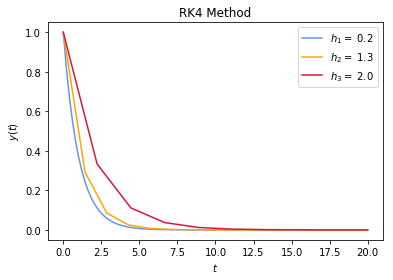

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from RK4 import *

def ODE(x, y, a=1.):
    rhs = -a*y
    return rhs


# Initial Condition
y_0 = 1.


# Creation of the grid
t_0 = 0.
t_f = 20.

# Two stepsizes to compare
n1 = 100
h1 = (t_f - t_0)/n1

n2 = 15
h2 = (t_f - t_0)/n2

n3 = 10
h3 = (t_f - t_0)/n3

# Arrays to store the solution
t1 = np.linspace(t_0, t_f, n1)
y1 = np.zeros(n1)
y1[0] = y_0

t2 = np.linspace(t_0, t_f, n2)
y2 = np.zeros(n2)
y2[0] = y_0

t3 = np.linspace(t_0, t_f, n3)
y3 = np.zeros(n3)
y3[0] = y_0

for i in range(1,n1):
    y1[i] = RK4(ODE, h1, 0, y1[i-1])

for i in range(1,n2):
    y2[i] = RK4(ODE, h2, 0, y2[i-1])

for i in range(1,n3):
    y3[i] = RK4(ODE, h3, 0, y3[i-1])

fig, ax = plt.subplots()
ax.plot(t1, y1, color='cornflowerblue', label=f'$h_1=$ {h1:.1f}')
ax.plot(t2, y2, color='orange', label=f'$h_2=$ {h2:.1f}')
ax.plot(t3, y3, color='crimson', label=f'$h_3=$ {h3:.1f}')

ax.set_title('RK4 Method')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$y(t)$')
plt.legend()
plt.show()


## Runge-Kutta Methods with Adaptive Step Size

The RK methods above require choosing a fixed step
size $h$ but, how should one choose this parameter? 

It would be better to choose an **error tolerance** and let $h$ be chosen
automatically to satisfy this error tolerance. 

This implies that  we need

1. A method for estimating the error.
2. A way to adjust the stepsize $h$, if the error is too large (or too small).

---
### Embedded RK Formulae

Embedded RK formulae provide an error estimator.  Now we will present the scheme for  3rd/4th order embedded RK (Bogaki and Shampine)

\begin{equation}
\begin{aligned}
k_1 &= h f(x_n, y_n)\,\,,\\
k_2 &= h f(x_n + \frac{1}{2} h, y_n + \frac{1}{2} k_1)\,\,,\\
k_3 &= h f(x_n + \frac{3}{4} h, y_n + \frac{3}{4} k_2)\,\,,\\
y_{n+1} &= y_n + \frac{2}{9} k_1 + \frac{1}{3} k_2 + \frac{4}{9} k_3 + \mathcal{O}(h^4)\,\,\\
k_4 &= h f(x_n + h, y_{n+1})\,\,\\
y^*_{n+1} &= y_n + \frac{7}{24} k_1 + \frac{1}{4}k_2 + \frac{1}{3}k_3 + \frac{1}{8} k_4 + \mathcal{O}(h^3)\,\,.
\end{aligned}
\end{equation}

The error is 

\begin{equation}
\delta y_{n+1} = y_{n+1} - y^*_{n+1}\,\,.
\end{equation}


In this scheme, $k_4$ of step $n$ is the same as $k_1$ of step $n+1$. Therefore, $k_1$ does not need to be recomputed on step $n+1$; simply
save $k_4$ and re-use it on the next step.
This trick is called **FSAL (First Same As Last)**.


Given the error estimate $\delta y_{n+1} = y_{n+1} - y^*_{n+1}$
we want that it says smaller than some tolerance, $|\delta y_{n+1}| \le
\epsilon$ by adjusting $h$.


Usually, one sets 

\begin{equation}
\epsilon = \epsilon_a + |y_{n+1}|\epsilon_r 
\end{equation}

where

$\epsilon_a$ : absolute error tolerance.

$\epsilon_r$ : relative error tolerance.

### Adjusting the Step Size $h$

We define 

\begin{equation}
\Delta = \frac{|\delta y_{n+1}|}{\epsilon}\,\,,
\end{equation}

and we want $\Delta \approx 1$.

Note that for a $p$-th-order formula, $\Delta \sim \mathcal{O}(h^p)$.
So if you took a step $h$ and got a value $\Delta$, then you change the step to $h_\text{desired}$,

\begin{equation}
h_\text{desired} = h \left|\frac{\Delta_\text{desired}}{\Delta} \right| ^\frac{1}{p}\,\,,
\end{equation}

to get the new  $\Delta_\text{desired} = 1$.

---

The algorithm to adjust $h$ can be written as follows:
1. Take step $h$, measure $\Delta$.
2. If $\Delta > 1$ (error too large), then

  - set $h_\text{new} = h \left| \frac{1}{\Delta} \right|^{\frac{1}{p}} S$, where $S$ is a fudge factor ($\sim$ $0.9$ or so).
  
  - **reject** the old step, redo with $h_\mathrm{new}$.
  
3. If $\Delta < 1$ (error too small), then

  - set $h_\text{new} = h \left| \frac{1}{\Delta} \right|^{\frac{1}{p}} S$.
  
  - **accept** old step, take next step with $h_\text{new}$.

